In [ ]:
 import math
 math.log((9/14),2)

-0.6374299206152917

In [ ]:
((9/14)*math.log((9/14),2))+((5/14)*math.log((5/14),2))

-0.9402859586706309

In [ ]:
from scipy.stats import entropy
entropy([9/14,5/14],base=2)

0.940285958670631

In [ ]:
entropy([9/14,5/14],base=2)

0.940285958670631

In [ ]:
entropy([5/14,9/14],base=2)

0.940285958670631

In [ ]:
from scipy.stats import entropy
entropy([3/5,2/5], base=2)

0.9709505944546688

In [ ]:
entropy(1/4,3/4,base=2)

0.0

In [ ]:
entropy([1/4,3/4],base =2)

0.8112781244591328

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [ ]:
df = pd .read_csv('dt.csv')

In [ ]:
df.head()

,Day,Outlook,Temp,Humidity,Wind,Decision
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
2,3,Overcast,Hot,High,Weak,Yes
3,4,Rain,Mild,High,Weak,Yes
4,5,Rain,Cool,Normal,Weak,Yes


In [ ]:
df = df.drop('Day',axis=1)

In [ ]:
df.head()

,Outlook,Temp,Humidity,Wind,Decision
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [ ]:
df = df.apply(LabelEncoder().fit_transform)

In [ ]:
df.columns

Index(['Outlook', 'Temp', 'Humidity', 'Wind', 'Decision'], dtype='object')

In [ ]:
X = df[['Outlook', 'Temp', 'Humidity', 'Wind']]
y = df ['Decision']

In [ ]:
dt = DecisionTreeClassifier(max_depth=5,criterion='entropy')

In [ ]:
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
from sklearn.tree import export_text

In [ ]:
result = export_text(dt,feature_names=['Outlook','Temp','Humidity','Wind'])

In [ ]:
print (result)

|--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Humidity <= 0.50
|   |   |--- Outlook <= 1.50
|   |   |   |--- class: 1
|   |   |--- Outlook >  1.50
|   |   |   |--- class: 0
|   |--- Humidity >  0.50
|   |   |--- Wind <= 0.50
|   |   |   |--- Temp <= 1.00
|   |   |   |   |--- class: 0
|   |   |   |--- Temp >  1.00
|   |   |   |   |--- class: 1
|   |   |--- Wind >  0.50
|   |   |   |--- class: 1



In [ ]:
from sklearn import tree

[Text(0.375, 0.9, 'x[0] <= 0.5\nentropy = 0.89\nsamples = 13\nvalue = [4, 9]'),
 Text(0.25, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\nentropy = 0.991\nsamples = 9\nvalue = [4, 5]'),
 Text(0.25, 0.5, 'x[0] <= 1.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.5, 'x[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.625, 0.3, 'x[1] <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]')]

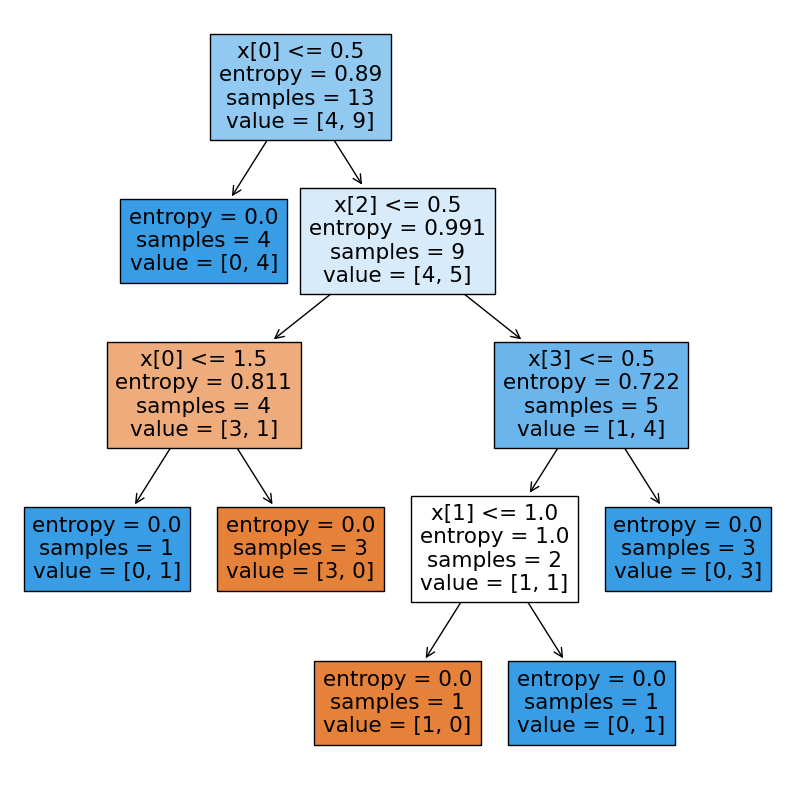

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
tree.plot_tree(dt,filled=True,ax=ax)

In [ ]:
dt.score(X,y)

1.0

In [ ]:
df = pd.read_csv('/content/iris.data',header=None, names=['sepal length','sepal width','petal length','petal width','class'])


In [ ]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df = df.apply(LabelEncoder().fit_transform)

In [ ]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

In [ ]:
X = df[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = df ['class']

In [ ]:
dt = DecisionTreeClassifier(max_depth=5,criterion='entropy')

In [ ]:
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
from sklearn.tree import export_text

In [ ]:
result = export_text(dt,feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'])


In [ ]:
print (result)

|--- petal width <= 5.50
|   |--- class: 0
|--- petal width >  5.50
|   |--- petal width <= 13.50
|   |   |--- petal length <= 25.50
|   |   |   |--- petal width <= 12.50
|   |   |   |   |--- class: 1
|   |   |   |--- petal width >  12.50
|   |   |   |   |--- class: 2
|   |   |--- petal length >  25.50
|   |   |   |--- petal width <= 11.50
|   |   |   |   |--- class: 2
|   |   |   |--- petal width >  11.50
|   |   |   |   |--- petal length <= 30.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length >  30.50
|   |   |   |   |   |--- class: 2
|   |--- petal width >  13.50
|   |   |--- petal length <= 24.50
|   |   |   |--- sepal length <= 16.50
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length >  16.50
|   |   |   |   |--- class: 2
|   |   |--- petal length >  24.50
|   |   |   |--- class: 2



In [ ]:
from sklearn import tree

[Text(0.5, 0.9166666666666666, 'x[3] <= 5.5\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 13.5\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 25.5\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 12.5\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 11.5\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 30.5\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.4615384615384615

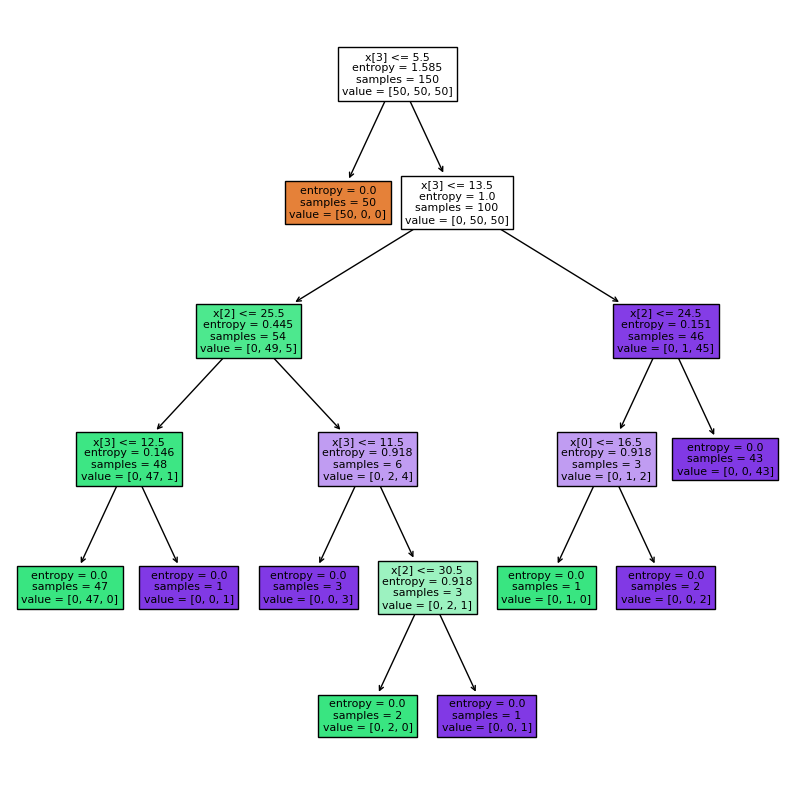

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
tree.plot_tree(dt,filled=True,ax=ax)

In [ ]:
dt.score(X,y)

1.0

In [ ]:
df = pd.read_csv('/content/ionosphere.data')

In [ ]:
df.head()

,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b


In [ ]:
df.columns

Index(['1', '0', '0.99539', '-0.05889', '0.85243', '0.02306', '0.83398',
       '-0.37708', '1.1', '0.03760', '0.85243.1', '-0.17755', '0.59755',
       '-0.44945', '0.60536', '-0.38223', '0.84356', '-0.38542', '0.58212',
       '-0.32192', '0.56971', '-0.29674', '0.36946', '-0.47357', '0.56811',
       '-0.51171', '0.41078', '-0.46168', '0.21266', '-0.34090', '0.42267',
       '-0.54487', '0.18641', '-0.45300', 'g'],
      dtype='object')

In [ ]:
df = df.apply(LabelEncoder().fit_transform)

In [ ]:
X = df[['1', '0', '0.99539', '-0.05889', '0.85243', '0.02306', '0.83398']]
y = df ['0.03760']

In [ ]:
dt = DecisionTreeClassifier(max_depth=5,criterion='gini')

In [ ]:
dt.fit(X,y)

DecisionTreeClassifier(max_depth=5)

In [ ]:
from sklearn.tree import export_text

[Text(0.455, 0.9166666666666666, 'x[0] <= 0.5\ngini = 0.977\nsamples = 350\nvalue = [17, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 39, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 28]'),
 Text(0.195, 0.75, 'x[6] <= 123.0\ngini = 0.641\nsamples = 38\nvalue = [6, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 

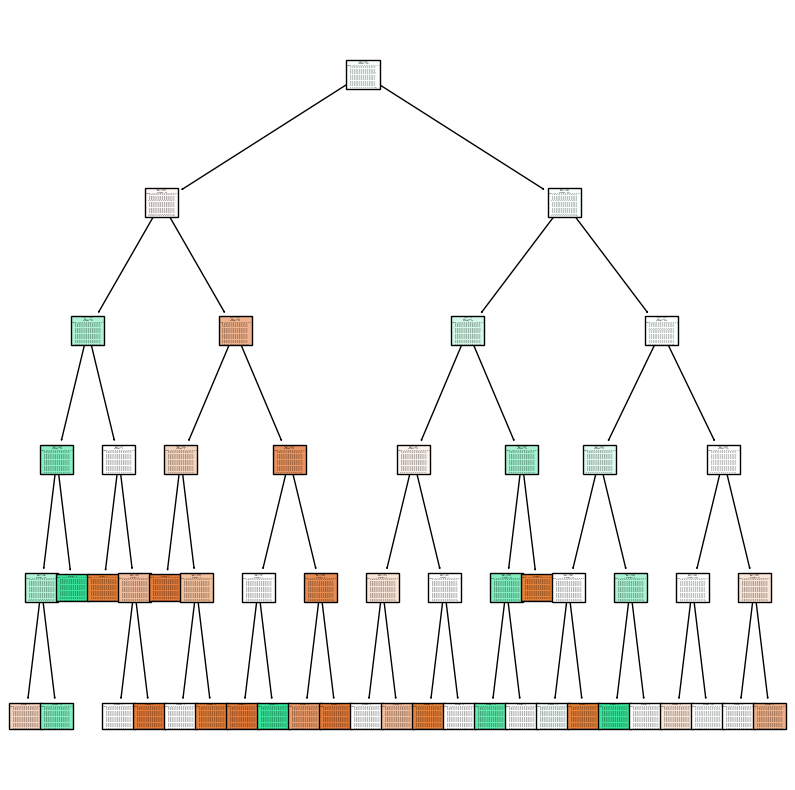

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
tree.plot_tree(dt,filled=True,ax=ax)

In [ ]:
dt.score(X,y)

0.20285714285714285